While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit the project's GitHub repository.

The following code will read the data into a pandas dataframe:


import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including:

RespondentID - An anonymized ID for the respondent (person taking the survey)
Gender - The respondent's gender
Age - The respondent's age
Household Income - The respondent's income
Education - The respondent's education level
Location (Census Region) - The respondent's location
Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response
There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, you'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

Instructions

Read the data set into a dataframe.
Explore the data by entering star_wars.head(10). Look for any strange values in the columns and rows.
Review the column names with star_wars.columns.
Remove any rows where RespondentID is NaN. You can use the pandas.notnull() function to accomplish this. Only select rows where the RespondentID column is not null.
When you're finished, star_wars should only consist of rows where RespondentID is not NaN.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: 

In [2]:
star_wars.columns
star_wars.shape
yes_no = {
    "Yes": True,
    "No": False
}

In [3]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]
star_wars.shape

(1186, 38)

In [4]:
seen = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]
seen = seen.map(yes_no)
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = seen
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
fan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]
fan = fan.map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = fan
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

For example, imagine we had this column series:


import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
We could convert the values using this mapping dictionary:


{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
After calling the map() method on a series, the column should only contain the values True and False.

Next, we'll need to rename the columns to better reflect what they represent. We can use the pandas.DataFrame.rename() method on dataframes to accomplish this.

The df.rename() method works a lot like map(). We pass it a dictionary that maps the current column names to new ones:


star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})
The pandas.DataFrame.rename() method will only rename the columns we specify in the dictionary, and won't change the names of other columns. The code above will rename the Which of the following Star Wars films have you seen? Please select all that apply. column to seen_1.

Instructions

Convert each column above so that it only contains the values True and False.
You can select the column names more quickly by entering star_wars.columns[3:9], rather than typing them out.
Be very careful with spacing when constructing your mapping dictionary! In the cells, Star Wars: Episode I The Phantom Menace has two spaces between the end of Episode I and the start of The Phantom, but this is not the case in Star Wars: Episode VI Return of the Jedi. Check the values in the cells carefully to make sure you use the appropriate spacing.
Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.
When you're finished, the columns should have intuitive names, along with True and False values that indicate whether the respondent saw each of the six Star Wars movies.

In [6]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)


In [7]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True    True    True    True    True    True   
2   False   False   False   False   False   False   
3    True    True    True   False   False   False   
4    True    True    True    True    True    True   
5    True    True    True    True    True    True   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

            ...                    Unnamed: 28  \
1           ...                 Very favorably   
2           ...                            NaN   
3           ...               Unfamiliar (N/A)   
4           ...                 Very favorably   
5           ...             Somewhat favorably   

        Which character shot first?  \
1  I don't understand this question   
2                               NaN   
3  I don't understand this question   
4  I don't understand this question   
5                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   
5                                                 No                   

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   
4                                                Yes                 Male   
5                                                 No                 Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  \
1    True    True    True    True    True    True        3.0   
2   False   False   False   False   False   False        NaN   
3    True    True    True   False   False   False        1.0   
4    True    True    True    True    True    True        5.0   
5    True    True    True    True    True    True        5.0   

            ...                    Unnamed: 28  \
1           ...                 Very favorably   
2           ...                            NaN   
3           ...               Unfamiliar (N/A)   
4           ...                 Very favorably   
5           ...             Somewhat favorably   

        Which character shot first?  \
1  I don't understand this question   
2                               NaN   
3  I don't understand this question   
4  I don't understand this question   
5                            Greedo   

   Are you familiar with the Expanded Universe?  \
1                                           Yes   
2                                           NaN   
3                                            No   
4                                            No   
5                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦  \
1                                                 No                    
2                                                NaN                    
3                                                NaN                    
4                                                NaN                    
5                                                 No                    

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                  Male   
2                                                Yes                  Male   
3                                                 No                  Male   
4                                                Yes                  Male   
5                                                 No                  Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree   
2  18-29         $0 - $24,999                   Bachelor degree   
3  18-29         $0 - $24,999                High school degree   
4  18-29  $100,000 - $149,999  Some college or Associate degree   
5  18-29  $100,000 - $149,999  Some college or Associate degree   

  Location (Census Region)  
1           South Atlantic  
2       West South Central  
3       West North Central  
4       West North Central  
5       West North Central  

[5 rows x 38 columns]

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

Instructions

Use the pandas.DataFrame.mean() method to compute the mean of each of the ranking columns from the last screen.
Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
Make sure to run %matplotlib inline beforehand to show your plots in the notebook.
Write up a summary of what you've done so far in a Markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
Remember that a lower ranking is better!

In [9]:
mean1 = star_wars[["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]].mean()
print(mean1)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<Container object of 6 artists>

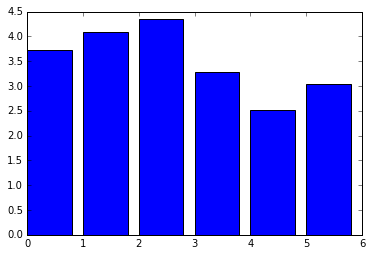

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

Instructions

Use the df.sum() method to compute the sum of each of the seen columns.
Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
Write up your thoughts on why the results look the way they do in a Markdown cell. Also discuss how the results correlate with the rankings.

<Container object of 6 artists>

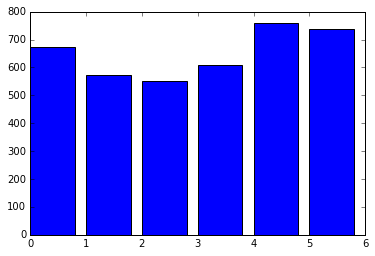

In [22]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

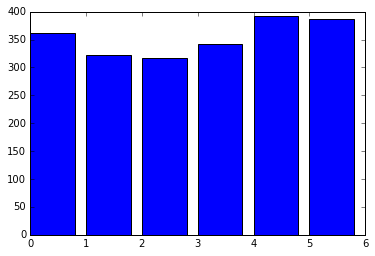

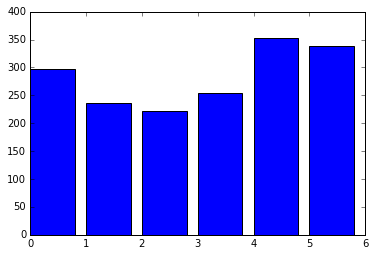

In [25]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()
plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

Conclusion: Men are more fans of Star Wars than Women.